# Final Project: Marcov Chain Monte Carlo

## Implement Metropolis-Hastings to form a mosaic


In [1]:
#Import relevant libraries
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import time

### Task 5: Implement MH to produce a sample from athe mosaic image distribution

In [2]:
#Function that computes P_Z(z)
def pZ(z,z_orig,z_prime,i,j,r):
    #Initialize counters
    sum_neigh_z_orig = 0
    sum_neigh_z_prime = 0
    neigh = []

    #Counts if neighboring pixels are the same while not on the edges
    if i!=0 and i!= 299 and j!=0 and j!=299:
        neigh.append(z[i-1][j-1])
        neigh.append(z[i-1][j])
        neigh.append(z[i-1][j+1])
        neigh.append(z[i][j-1])
        neigh.append(z[i][j+1])
        neigh.append(z[i+1][j-1])
        neigh.append(z[i+1][j])
        neigh.append(z[i+1][j+1])

        sum_neigh_z_orig = neigh.count(z_orig)
        sum_neigh_z_prime = neigh.count(z_prime)
   
   #Counts if neighboring pixels are the same while on the edges
    else:
        for zi in range(i-1,i+2):
            if zi >= 0 and zi <= 299:
                for zj in range(j-1, j+2):
                    if zj >= 0 and zj <= 299: 
                        if z_orig == z[zi][zj]:
                            sum_neigh_z_orig += 1
                        if z_prime == z[zi][zj]:
                            sum_neigh_z_prime += 1 
        sum_neigh_z_orig -= 1 #Eliminates self
        sum_neigh_z_prime -= 1 #Eliminates self 


    p = np.exp(r*(sum_neigh_z_prime - sum_neigh_z_orig))
    return p

Color Palette:


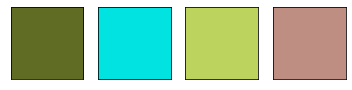

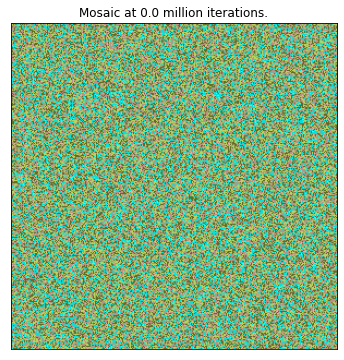

Color Palette:


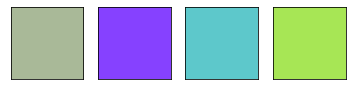

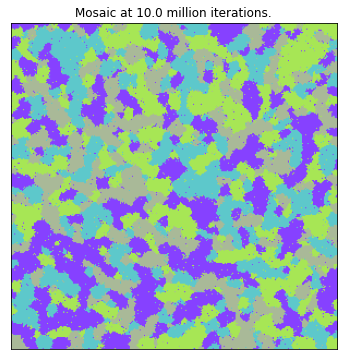

Color Palette:


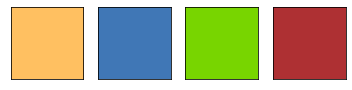

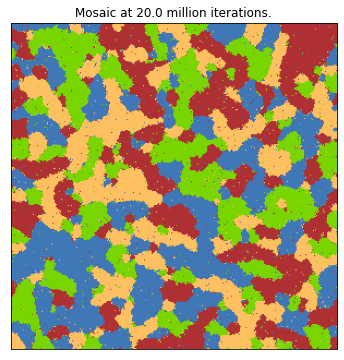

Color Palette:


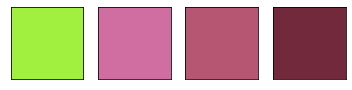

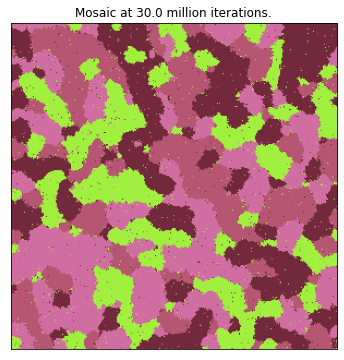

Color Palette:


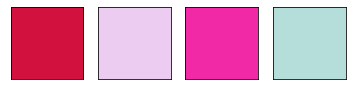

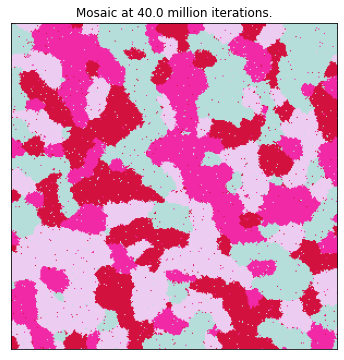

Color Palette:


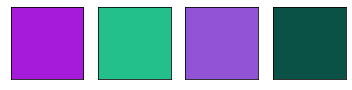

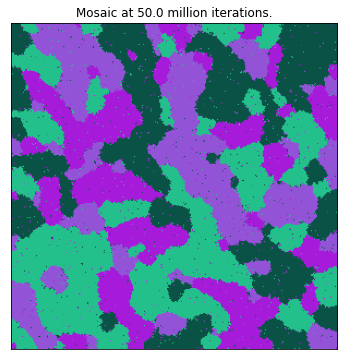

Color Palette:


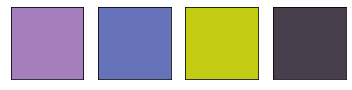

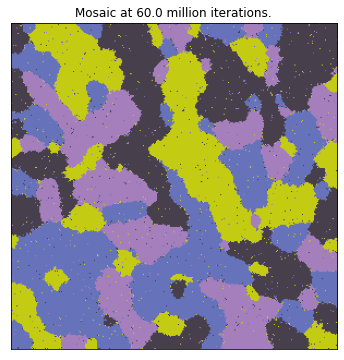

Color Palette:


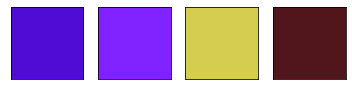

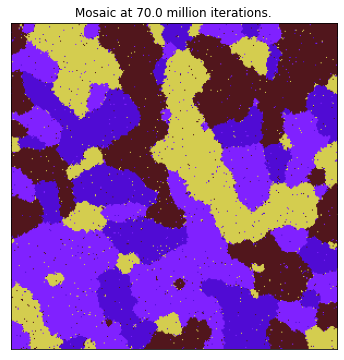

Color Palette:


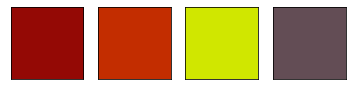

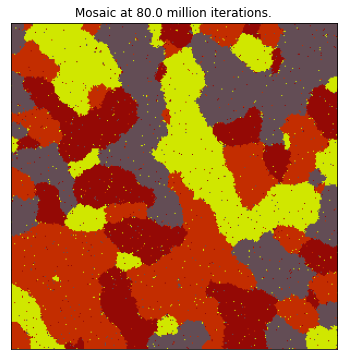

Color Palette:


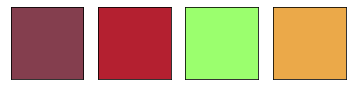

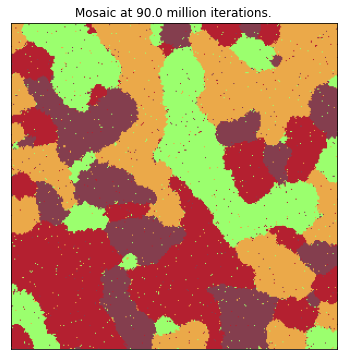

Color Palette:


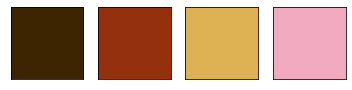

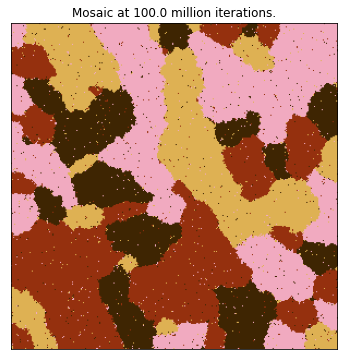

In [3]:
#Initialize P: Palette for random RGB colors
k = 4
P = np.zeros((k,3))

for i in range(k):
    for j in range(len(P[i])):
        P[i][j] = np.random.uniform(0,255)

#Initialize Z: vector of index variables
Z = np.zeros((300,300))
for row in range(len(Z)):
    for col in range(len(Z[row])):
        Z[row][col] = np.random.randint(0,4)

#Set number of iterations
iterations = 100*10**6+1

for n in range(iterations):
    #Select one random variable (Z from 0-89999 - P from 90000-90011)
    ran = np.random.randint(0, 90000+3*k)

    #If Z is selected
    if ran < 90000:
        row = ran // 300
        col = ran - row*300
        zij = Z[row][col]
        zprim=np.random.randint(0,k)
        
        #Avoids alpha values going over range
        if zprim > k-1:
            zprim = k-1 /1.0
        elif zprim < 0:
            zprim = 0.0
        
        alpha = pZ(Z,zij,zprim,row,col,0.7)
        if np.random.rand() < alpha:
            Z[row][col] = zprim
    
    #Else if P is selected
    else:
        color = (ran - 90000) // 3
        channel = (ran-90000) - (color*3)

        p_curr = P[color][channel]
        p_prime = p_curr + 10*np.random.randn()

        if p_prime > 255:
            p_prime = 255
        elif p_prime < 0:
            p_prime = 0

        alpha = 1

        if np.random.randn() < alpha:
            P[color][channel] = p_prime
    
    #Every 10 million iterations, show color pallette and mosaic
    if n % (10*10**6) == 0:
        #Show color palette
        print("Color Palette:")
        for i in range(k):
            plt.subplot(1,k,i+1)
            plt.imshow(P[i].reshape(1,1,3)/255.0)
            plt.xticks([]),plt.yticks([])
        plt.show()

        #From P and Z generate image
        X = np.zeros((300*300,3))
        for i in range(len(Z.flat)):
            X[i] = P[int(Z.flat[i])]
        X = X.reshape((300,300,3))

        #Show image
        plt.figure(figsize=(6,6))
        plt.title("Mosaic at "+str((n)/(1*10**6))+" million iterations.")
        plt.imshow(X/255.0)
        plt.xticks([]),plt.yticks([])
        plt.show()
